# Leaspy model for comparison

In [33]:
import torch
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
# import leaspy

path_leaspy = '/home/benoit.sautydechalon/leaspy/'
sys.path.append(path_leaspy)

from leaspy import Leaspy, Data, IndividualParameters, AlgorithmSettings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### MDS

In [34]:
data = pd.DataFrame(index=[ids, times], columns=['mds1', 'mds2'])
data['mds1'] = mds1
data['mds2'] = mds2
data.index.set_names(['ID','TIME'], inplace=True)
data

NameError: name 'mds1' is not defined

## ADNI data

In [35]:
path = '../adni_study'
data = '/data_adni'

times = [time[0] for time in pd.read_csv(path+data+'/X.csv', header=None).values]
#hip = [score[0] for score in pd.read_csv(path+data+'/Y_adas.csv', header=None).values]
ven = [score[0] for score in pd.read_csv(path+data+'/Y_adas.csv', header=None).values]
adas = [score[1] for score in pd.read_csv(path+data+'/Y_adas.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+data+'/group.csv', header=None).values]

In [36]:
data = pd.DataFrame(index=[ids, times], columns=['ven', 'adas'])
#data['hip'] = hip
data['ven'] = ven
data['adas'] = adas
data.index.set_names(['ID','TIME'], inplace=True)
data

ven      adas
ID   TIME                      
21   77.640  0.292681  0.096012
     78.647  0.348860  0.162012
     79.630  0.332652  0.036000
     80.649  0.324140  0.167988
     82.694  0.365129  0.162012
...               ...       ...
5290 67.079  0.092811  0.203988
     69.128  0.159048  0.138000
     71.074  0.217518  0.126012
     72.211  0.198040  0.111000
     73.068  0.215177  0.060012

[2673 rows x 2 columns]

### Simulated data

In [142]:
path = '../simulated_study'
data = '/simulated_data_metric_1'

times = [time[0] for time in pd.read_csv(path+data+'/X.csv', header=None).values]
logistic = [score[0] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
sum_logistic = [score[1] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+data+'/group.csv', header=None).values]

In [143]:
data = pd.DataFrame(index=[ids, times], columns=['logistic', 'sum_logistic'])
data['logistic'] = logistic
data['sum_logistic'] = sum_logistic
data.index.set_names(['ID','TIME'], inplace=True)
data

logistic  sum_logistic
ID  TIME                            
0   69.76381  0.757825      0.449024
    70.16381  0.762448      0.519819
    70.56381  0.723426      0.501171
    70.96381  0.763044      0.526731
    71.36381  0.804602      0.495426
...                ...           ...
299 70.44248  0.467512      0.922183
    70.84248  0.520318      0.930383
    71.24248  0.504897      0.910310
    71.64248  0.511996      0.957397
    72.04248  0.494403      0.943727

[4200 rows x 2 columns]

### Pruned data

In [20]:
path = '../simulated_study'
path_data = '/simulated_data_3'

times = [time[0] for time in pd.read_csv(path+path_data+'/X.csv', header=None).values]
logistic = [score[0] for score in pd.read_csv(path+path_data+'/Y_pruned.csv', header=None).values]
sum_logistic = [score[1] for score in pd.read_csv(path+path_data+'/Y_pruned.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+path_data+'/group.csv', header=None).values]

In [21]:
data_pruned = pd.DataFrame(index=[ids, times], columns=['logistic', 'sum_logistic'])
data_pruned['logistic'] = logistic
data_pruned['sum_logistic'] = sum_logistic
data_pruned.index.set_names(['ID','TIME'], inplace=True)
data_pruned

logistic  sum_logistic
ID  TIME                             
0   56.340559       NaN           NaN
    56.840559       NaN           NaN
    57.340559  0.252891      0.440507
    57.840559       NaN           NaN
    58.340559  0.261381      0.477437
...                 ...           ...
199 72.828851       NaN           NaN
    73.328851  0.694015      0.922010
    73.828851  0.699477      0.911478
    74.328851  0.686855      0.922275
    74.828851       NaN           NaN

[2000 rows x 2 columns]

## Leaspy model

In [ ]:
n_iter = 6000
n_sources = 1

settings = AlgorithmSettings('mcmc_saem', n_iter=n_iter, progress_bar=True)
settings.set_logs(path='logs_small_model',  plot_periodicity=50,save_periodicity=10,
                           console_print_periodicity=None,overwrite_logs_folder=True) 
# Fitting the model

ip_list = []
model_parameters_list = []

for i in range(5):

    leaspy = Leaspy('logistic')
    leaspy.model.load_hyperparameters({'source_dimension': n_sources})

    data_leaspy = Data.from_dataframe(data)

    leaspy.fit(data_leaspy, settings)
    print(leaspy.model.parameters)
    settings_2 = AlgorithmSettings('mode_real', n_jobs=2, use_jacobian=True)

    #data_leaspy = Data.from_dataframe(data_pruned)
    individual_parameters = leaspy.personalize(data_leaspy, settings_2)
    individual_parameters.to_dataframe().to_csv('joint_study_small_param.csv')
    
    model_parameters_list.append(leaspy.model.parameters)
    ip_list.append(individual_parameters)


...overwrite logs folder...
|##################################################|   6000/6000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0250

Calibration took: 9min 56s
{'g': tensor([-0.1072, -1.6161]), 'v0': tensor([-4.9179, -5.0762]), 'betas': tensor([[-0.2764]]), 'tau_mean': tensor(72.0437), 'tau_std': tensor(23.0555), 'xi_mean': tensor(0.), 'xi_std': tensor(0.4817), 'sources_mean': tensor(0.), 'sources_std': tensor(1.), 'noise_std': tensor(0.0250)}

The standard deviation of the noise at the end of the personalization is:
0.0254

Personalization mode_real took: 8s
|##################################################|   6000/6000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0249

Calibration took: 9min 55s
{'g': tensor([-0.1955, -1.8915]), 'v0': tensor([-5.0245, -5.2942]), 'betas': tensor([[0.2267]]), 'tau_mean': tensor(75.5652), 'tau_std': tensor(26.0809), 'xi_mean': tensor(0.), 'xi_std': tensor(0.5202), 

In [38]:
settings_2 = AlgorithmSettings('mode_real', n_jobs=2, use_jacobian=True)

#data_leaspy = Data.from_dataframe(data_pruned)
individual_parameters = leaspy.personalize(data_leaspy, settings_2)
individual_parameters.to_dataframe().to_csv('joint_study_small_param.csv')


The standard deviation of the noise at the end of the personalization is:
0.0775

Personalization mode_real took: 9s


In [40]:
data['TIME'] = data.index.get_level_values(1)
data['ID'] = data.index.get_level_values(0)
data = data.set_index('ID')

In [41]:
individual_parameters = pd.read_csv('joint_study_small_param.csv').set_index('ID')
individual_parameters.index = data.index.unique()
individual_parameters

,tau,xi,sources
ID,,,
21,85.540245,0.667834,-0.011893
56,86.249893,0.232903,0.134936
69,64.635963,-0.248270,-0.099986
377,69.483185,-0.024864,0.201035
413,92.900345,-0.617540,-0.724558
...,...,...,...
5259,86.278564,-0.247130,0.912035
5265,74.444199,1.089990,-1.399066
5266,88.762451,1.084118,-3.810129


In [42]:
individual_parameters.describe()

,tau,xi,sources
count,430.000000,430.000000,430.000000
mean,70.379023,0.272492,0.012552
std,8.152872,0.796924,0.983078
min,41.641953,-2.815709,-3.810129
25%,64.785683,-0.218713,-0.591356
50%,70.865173,0.157234,-0.010968
75%,75.940458,0.695424,0.688254
max,92.900345,3.105773,2.936688


In [43]:
from utils import predict_scores

predicted_scores = predict_scores(data, individual_parameters, leaspy)
abs(predicted_scores - data).describe()

,TIME,adas,ven
count,2673.0,2673.000000,2.673000e+03
mean,0.0,0.076003,2.042748e-02
std,0.0,0.073486,2.057296e-02
min,0.0,0.000012,3.797269e-07
25%,0.0,0.025923,7.133382e-03
50%,0.0,0.058059,1.500002e-02
75%,0.0,0.101579,2.727217e-02
max,0.0,0.761525,3.220688e-01


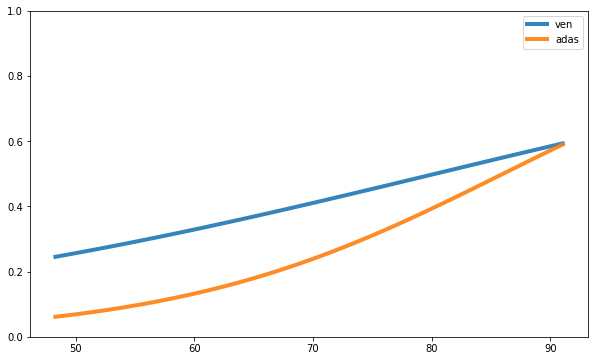

In [44]:
model = leaspy.model

labels = model.features
fig, ax = plt.subplots(figsize=(10, 6))

cmap = matplotlib.cm.get_cmap('viridis_r')
colors = [cmap(11*i) for i in range(121)]

mean_time = model.parameters['tau_mean']
std_time = max(model.parameters['tau_std'], 4)
timepoints = np.linspace(mean_time - 2* std_time, mean_time + 2* std_time, 100)
timepoints = torch.Tensor([timepoints])

mean_trajectory = model.compute_mean_traj(timepoints).detach().numpy()

for i in range(len(labels)):
    ax.plot(timepoints[0, :].detach().numpy(), mean_trajectory[0, :, i], label=labels[i],
            linewidth=4, alpha=0.9)  # , c=colors[i])
    
ax.legend()

plt.ylim((0,1))
plt.show()

## Visualization of distribution of diagnosis vs (tau/xi)

In [45]:
diag = pd.read_csv('~/ADNI-analysis/longitudinal_study/data/ADNI_cog_full.csv',usecols=['ID', 'session_id', 'TIME', 'diagnosis']).set_index('ID')

In [46]:
sub_diag = pd.DataFrame(index=diag.index.unique(), columns=['diag', 'label'])

for sub in sub_diag.index:
    if type(diag.loc[sub]) == pd.core.series.Series:
        sub_diag.drop(sub)
    else:
        if 'AD' in diag.loc[sub].values:
            sub_diag.loc[sub]['diag'] = 'AD'
            sub_diag.loc[sub]['label'] = 2
        elif 'MCI' in diag.loc[sub].values:
            sub_diag.loc[sub]['diag'] = 'MCI'
            sub_diag.loc[sub]['label'] = 1
        else:
            sub_diag.loc[sub]['diag'] = 'CN'
            sub_diag.loc[sub]['label'] = 0


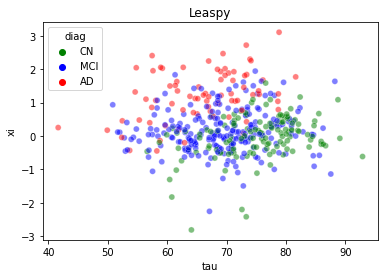

In [47]:
%matplotlib inline

sub_diag = sub_diag.loc[individual_parameters.index]
individual_parameters['diag'] = sub_diag['diag']
individual_parameters['label'] = sub_diag['label']


sns.scatterplot(data = individual_parameters,
                x = 'tau', 
                y = 'xi', 
                hue = 'diag',
                alpha=0.5, 
                palette = ['g', 'b', 'r'])
plt.title('Leaspy')
plt.show()

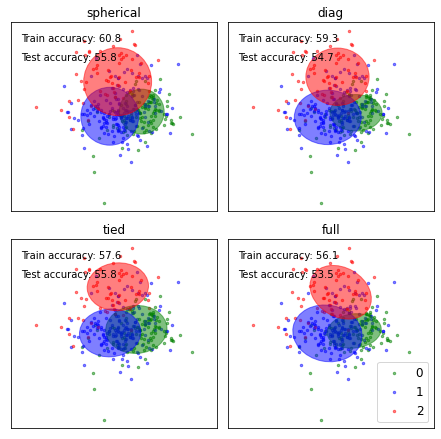

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

colors = ['green', 'blue', 'red']
data = individual_parameters

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')


X, y = StandardScaler().fit_transform(data[['tau', 'xi']]), data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=50, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1],  s=6, alpha=0.5, color=color,label=n)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)
    
    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)


    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [131]:
test_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [130]:
train_index

array([ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 26

In [136]:
y

ID
21      0
56      1
69      1
377     1
413     0
       ..
5259    0
5265    0
5266    0
5289    0
5290    0
Name: label, Length: 430, dtype: object

In [141]:
from sklearn.model_selection import KFold

train_total, test_total = 0, 0

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
print(kf)

y = np.array(y)

for train_index, test_index in kf.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    n_classes = len(np.unique(y_train))

    estimator = GaussianMixture(n_components=n_classes, covariance_type='full', max_iter=100, random_state=0)
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    train_total += train_accuracy

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    test_total += test_accuracy

print(train_total/5, test_total/5)

KFold(n_splits=5, random_state=None, shuffle=True)
57.093023255813954 55.581395348837205


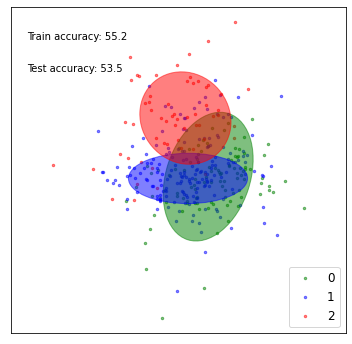

In [139]:
estimator = GaussianMixture(n_components=n_classes, covariance_type='full', max_iter=80, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

# Train the other parameters using the EM algorithm.
estimator.fit(X_train)

plt.figure(figsize=(3 * n_estimators // 2, 6))
h = plt.subplot(111)
make_ellipses(estimator, h)

for n, color in enumerate(colors):
    data = X_train[y_train == n]
    plt.scatter(data[:, 0], data[:, 1], s=6, alpha=0.5, color=color,label=n)

y_train_pred = estimator.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
         transform=h.transAxes)

y_test_pred = estimator.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
         transform=h.transAxes)


plt.xticks(())
plt.yticks(())

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [117]:
y_test = y_test.astype(int)

In [118]:
y_test_pred = y_test_pred.astype(int)

<AxesSubplot:>

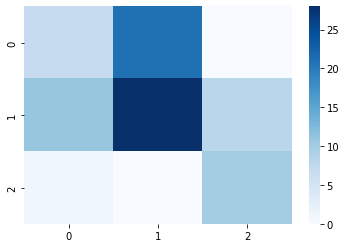

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.ravel(), y_test_pred.ravel(), labels=[0, 1, 2])  
sns.heatmap(cm, cmap=plt.cm.Blues)

<AxesSubplot:xlabel='tau', ylabel='xi'>

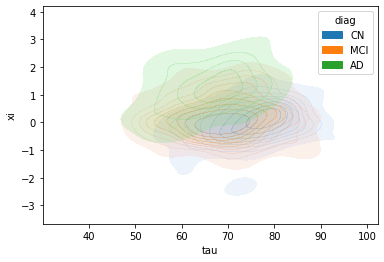

In [49]:
sns.kdeplot(data=individual_parameters, x='tau', y='xi', hue='diag', fill=True, alpha=0.2)

In [13]:
true_individual_parameters = pd.read_csv(path+'/simulated_data_1/true_individual_parameters.csv').set_index('Unnamed: 0')
true_individual_parameters.index.name = 'ID'
true_individual_parameters

,xi,tau,source
ID,,,
0,-0.042195,65.204252,14.855125
1,0.277844,72.614263,-4.664902
2,-0.448266,62.417224,11.654640
3,0.687274,78.584107,10.606578
4,0.474100,88.115856,-4.351091
...,...,...,...
295,-0.266133,89.821899,-14.452402
296,0.578161,85.970123,-4.993718
297,0.419483,77.756186,-1.596787


In [29]:
abs(true_individual_parameters - individual_parameters).describe()

,source,sources,tau,xi
count,0.0,0.0,300.000000,300.000000
mean,NaN,NaN,16.290012,0.503500
std,NaN,NaN,11.039638,0.390073
min,NaN,NaN,0.214407,0.000187
25%,NaN,NaN,7.583963,0.216354
50%,NaN,NaN,14.494875,0.396142
75%,NaN,NaN,22.746722,0.751932
max,NaN,NaN,52.247168,1.787517
